In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno


In [40]:
cml1 = pd.read_csv("main_file_final.csv")
cml1

,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,Ventricles,...,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
1,2,NL,sc,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
2,2,NL,bl,011_S_0002,74.3,Male,16.0,ADNI1,2005-08-09,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
3,2,NL,m06,011_S_0002,74.3,Male,16.0,ADNI1,2006-06-03,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
4,2,NL,m36,011_S_0002,74.3,Male,16.0,ADNI1,2008-08-27,118233.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22807,7102,NL,sc,341_S_7102,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22808,7103,NL,sc,013_S_7103,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22809,7104,NL,sc,153_S_7104,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,False,NL-NL
22810,7105,MCI,sc,035_S_7105,NaN,NaN,NaN,ADNI3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI


In [41]:
cml1.columns

Index(['RID', 'DIAG', 'VISCODE2', 'PTID', 'AGE', 'PTGENDER', 'PTEDUCAT',
       'Phase', 'EXAMDATE', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'Ventricles_bl',
       'Hippocampus_bl', 'WholeBrain_bl', 'Entorhinal_bl', 'Fusiform_bl',
       'MidTemp_bl', 'ICV_bl', 'ABETA', 'TAU', 'PTAU', 'ABETA_bl', 'TAU_bl',
       'PTAU_bl', 'ratio_Ventricles_bl', 'ratio_Hippocampus_bl',
       'ratio_WholeBrain_bl', 'ratio_Entorhinal_bl', 'ratio_Fusiform_bl',
       'ratio_ICV_bl', 'ratio_ABETA_bl', 'ratio_TAU_bl', 'ratio_PTAU_bl',
       'EXAMDATE_bl', 'duration_in_days', 'Ventricles_reduction_per_year',
       'Hippocampus_reduction_per_year', 'wholebrain_reduction_per_year',
       'Entorhinal_reduction_per_year', 'Fusiform_reduction_per_year',
       'ICV_reduction_per_year', 'ABETA_reduction_per_year',
       'TAU_reduction_per_year', 'PTAU_reduction_per_year', 'insomnia',
       'NPIK1', 'NPIK2', 'NPIK3', 'NPIK4', 'NPIK5', 'NPIK6', 'NPIK7', '

In [42]:
cml1.describe()

,RID,AGE,PTEDUCAT,Ventricles,Hippocampus,WholeBrain,Entorhinal,Fusiform,MidTemp,ICV,...,NPIK5,NPIK6,NPIK7,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA
count,22812.000000,21049.000000,21062.000000,20647.000000,20245.000000,2.071500e+04,19970.000000,19970.000000,19970.000000,2.074500e+04,...,7110.000000,7114.000000,7114.000000,7095.000000,7121.000000,7139.000000,7121.000000,7121.000000,7519.000000,22198.000000
mean,2868.924250,73.197216,16.094815,42976.722148,6749.194389,1.014363e+06,3553.117977,17337.756485,19441.666149,1.519450e+06,...,0.036568,0.199044,0.295052,0.119662,2.612554,1.304945,1.007583,3.567617,1.363213,0.099784
std,2220.285676,7.016856,2.777794,23954.089021,1228.564527,1.124657e+05,860.344389,2776.742469,3151.349270,1.735110e+05,...,0.187712,0.399309,0.456098,0.324588,1.040341,0.540479,1.168740,2.406793,0.573312,0.299718
min,1.000000,50.400000,4.000000,5650.000000,2219.000000,5.212870e+05,976.000000,7739.000000,8044.000000,7.089130e+05,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,752.000000,68.500000,14.000000,25565.000000,5945.000000,9.374910e+05,2977.000000,15536.000000,17402.500000,1.402260e+06,...,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,2.000000,1.000000,0.000000
50%,2234.000000,73.200000,16.000000,37692.800000,6837.000000,1.012340e+06,3591.500000,17361.000000,19466.000000,1.505980e+06,...,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,1.000000,3.000000,1.000000,0.000000
75%,4712.000000,78.100000,18.000000,54596.000000,7618.400000,1.089180e+06,4140.000000,19155.500000,21555.000000,1.621720e+06,...,0.000000,0.000000,1.000000,0.000000,3.000000,2.000000,2.000000,4.000000,2.000000,0.000000
max,7106.000000,91.400000,20.000000,162729.000000,11207.000000,1.486040e+06,7062.000000,29950.000000,32324.000000,3.500150e+06,...,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,5.000000,12.000000,3.000000,1.000000


In [43]:
cml1.iloc[1].tolist()

[2,
 'NL',
 'sc',
 '011_S_0002',
 74.3,
 'Male',
 16.0,
 'ADNI1',
 '2005-08-09',
 118233.0,
 8336.0,
 1229740.0,
 4177.0,
 16559.0,
 27936.0,
 1984660.0,
 118233.0,
 8336.0,
 1229740.0,
 4177.0,
 16559.0,
 27936.0,
 1984660.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 nan,
 nan,
 nan,
 '2005-08-09',
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 0.0,
 'NL',
 False,
 'NL-NL']

RID: Participant Roster ID, a unique identifier for each study participant.
**DIAG**: Diagnosis at the time of the visit or assessment.
VISCODE2: Visit code, possibly a more detailed or specific identifier for each visit.
PTID: Patient ID, another unique identifier for participants, potentially used across different phases or aspects of the study.
AGE: Age of the participant at the time of the visit or assessment.
PTGENDER: Participant's gender.
PTEDUCAT: Participant's education level, often in years.
**Phase**: The phase of the ADNI study the data belongs to (ADNI has multiple phases over time, each with specific focuses).
**EXAMDATE**: The date on which the examination or assessment was conducted.
Ventricles, Hippocampus, WholeBrain, Entorhinal, Fusiform, MidTemp, ICV: These columns represent volumetric measurements or scores from brain imaging (MRI or PET scans), indicating the size or volume of these brain regions or structures. ICV stands for Intracranial Volume.
_bl: Suffix indicating baseline measurements for the corresponding variable. For instance, Ventricles_bl would be the baseline volume of the ventricles.
**ABETA, TAU, PTAU**: Biomarkers measured in cerebrospinal fluid (CSF), with ABETA referring to beta-amyloid levels, TAU to total tau protein levels, and PTAU to phosphorylated tau protein levels. These are critical in the context of Alzheimer’s disease.
_bl for biomarkers: Baseline levels of the respective biomarkers.
ratio_: Likely indicates the ratio of the current value to the baseline value for various measurements or biomarkers.
EXAMDATE_bl: The date of the baseline examination or assessment.
duration_in_days: The duration in days from the baseline visit to the current visit.
_reduction_per_year: These columns likely represent the rate of reduction or change per year in the volume of brain regions (e.g., Ventricles_reduction_per_year) or levels of biomarkers (e.g., ABETA_reduction_per_year).
**insomnia, OSA**: These columns could indicate the presence or severity of sleep-related issues such as insomnia or obstructive sleep apnea (OSA).
**NPIK1 - NPIK9C**: These likely represent scores or indicators from the Neuropsychiatric Inventory (NPI), a tool used to assess neuropsychiatric symptoms in dementia. The letters and numbers could refer to specific questions or sections of the inventory.
**NPIKTOT, NPIKSEV**: These columns might represent total scores and severity scores derived from the NPI.
PREV_DIAG: Previous diagnosis, indicating the participant's diagnosis before the current one.
DIAG_CHANGED: A flag or indicator showing whether the diagnosis has changed from the previous assessment.
DIAG_GROUP: A categorization or grouping of diagnoses, potentially used for analysis or subgrouping within the study.

In [44]:
print("Diagnosis:", cml1.DIAG.unique())
print("Phase", cml1.Phase.unique())
print("Insomnia:", cml1.insomnia.unique())
print("OSA", cml1.OSA.unique())
print("NPIK Total Score:", sorted(cml1.NPIKTOT.unique()))
print("NPIK Severity:", sorted(cml1.NPIKSEV.unique()))
print("ABETA:", cml1.ABETA.nunique())
print("TAU:", cml1.TAU.nunique())
print("PTAU:", cml1.PTAU.nunique())

Diagnosis: [nan 'NL' 'AD' 'MCI']
Phase [nan 'ADNI1' 'ADNIGO' 'ADNI2' 'ADNI3']
Insomnia: [nan  0.  1.]
OSA [nan  0.  1.]
NPIK Total Score: [nan, 0.0, 1.0, 2.0, 3.0, 4.0, 6.0, 8.0, 9.0, 12.0]
NPIK Severity: [nan, 1.0, 2.0, 3.0]
ABETA: 1714
TAU: 1779
PTAU: 1434


In [45]:
# Percentage of NaNs per column
cml1.isna().mean().sort_values(ascending=False) * 100

PTAU_reduction_per_year     75.526039
ABETA_reduction_per_year    73.570928
NPIK8                       68.897948
NPIK5                       68.832194
NPIK4                       68.823426
                              ...    
DIAG                         2.678415
Phase                        2.678415
PTID                         2.678415
DIAG_CHANGED                 0.000000
RID                          0.000000
Length: 67, dtype: float64

**EDA**

<Axes: >

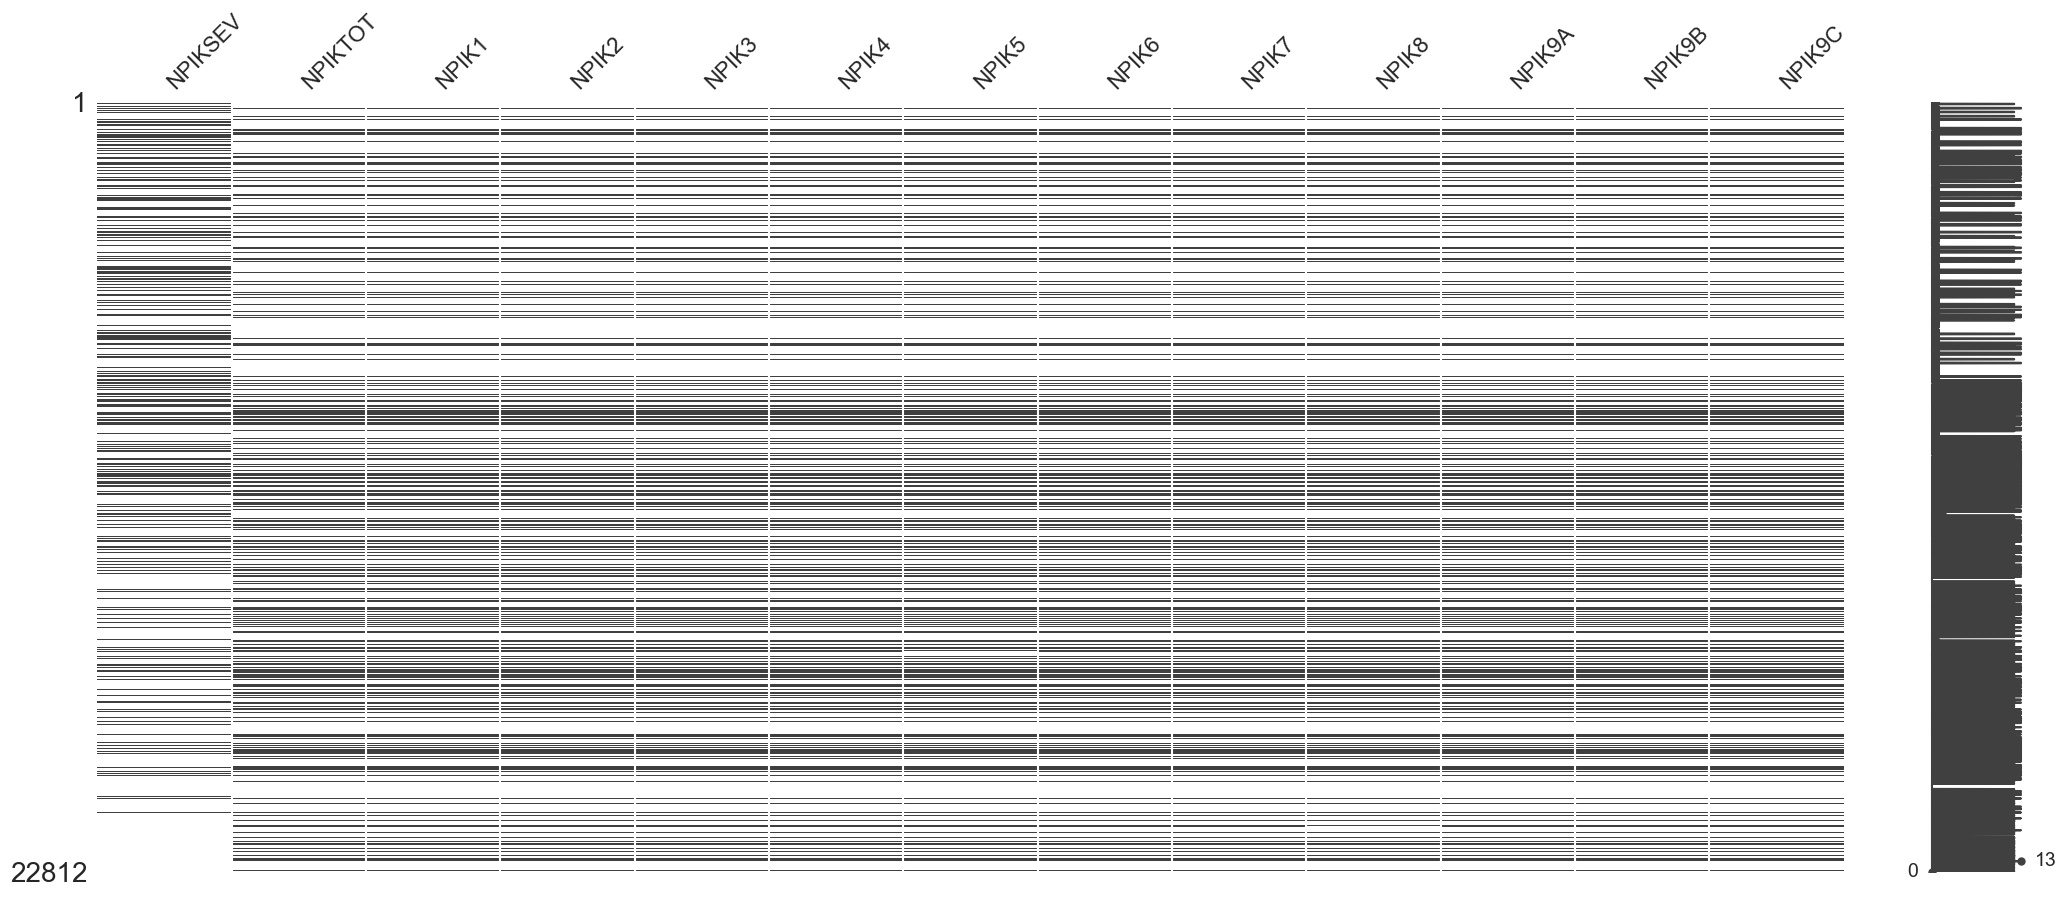

In [46]:
eda = cml1[["Phase", "DIAG", "insomnia", "OSA", "NPIKSEV", "NPIKTOT", "NPIKSEV", "NPIKTOT", "NPIK1", "NPIK2", "NPIK3", "NPIK4", "NPIK5", "NPIK6", "NPIK7", "NPIK8", "NPIK9A", "NPIK9B", "NPIK9C"]]
npik = cml1[["NPIKSEV", "NPIKTOT", "NPIK1", "NPIK2", "NPIK3", "NPIK4", "NPIK5", "NPIK6", "NPIK7", "NPIK8", "NPIK9A", "NPIK9B", "NPIK9C"]]
msno.matrix(npik)



In [47]:
cml1["DIAG"] = cml1["DIAG"].astype("str")
cml1["DIAG"] = cml1["DIAG"].replace("NL", "CN")
cml1["DIAG"] = pd.Categorical(cml1["DIAG"], categories  = ['CN', 'MCI', 'AD'], ordered = True)

/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1155801900.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  proportions_insomnia = cml1.groupby(['DIAG', 'insomnia']).size().reset_index(name='count')
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1155801900.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts_insomnia = proportions_insomnia.groupby('DIAG')['count'].transform('sum')
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1155801900.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future vers

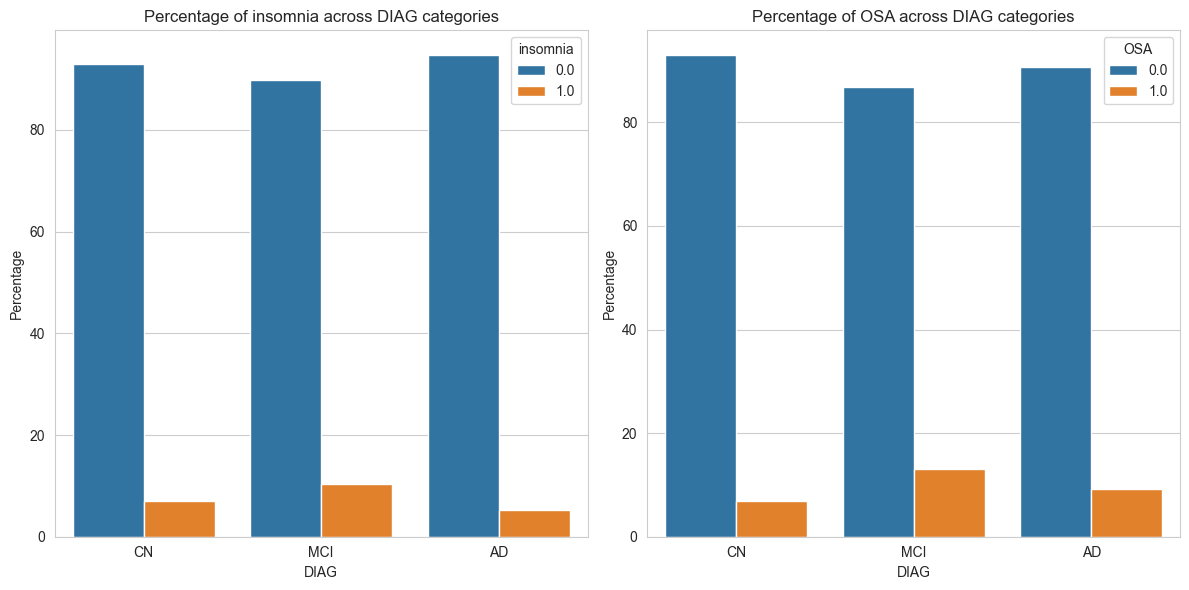

In [48]:
# Calculate the proportions for insomnia
proportions_insomnia = cml1.groupby(['DIAG', 'insomnia']).size().reset_index(name='count')
total_counts_insomnia = proportions_insomnia.groupby('DIAG')['count'].transform('sum')
proportions_insomnia['percentage'] = (proportions_insomnia['count'] / total_counts_insomnia) * 100

# Calculate the proportions for OSA
proportions_osa = cml1.groupby(['DIAG', 'OSA']).size().reset_index(name='count')
total_counts_osa = proportions_osa.groupby('DIAG')['count'].transform('sum')
proportions_osa['percentage'] = (proportions_osa['count'] / total_counts_osa) * 100

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot for insomnia
sns.barplot(data=proportions_insomnia, x='DIAG', y='percentage', hue='insomnia', ci=None, ax=axes[0])
axes[0].set_title('Percentage of insomnia across DIAG categories')
axes[0].set_xlabel('DIAG')
axes[0].set_ylabel('Percentage')

# Plot for OSA
sns.barplot(data=proportions_osa, x='DIAG', y='percentage', hue='OSA', ci=None, ax=axes[1])
axes[1].set_title('Percentage of OSA across DIAG categories')
axes[1].set_xlabel('DIAG')
axes[1].set_ylabel('Percentage')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

In [49]:
cml1_mci_ad = cml1.copy()
# Replace "AD" with "MCI & AD" and "MCI" with "MCI"
cml1_mci_ad['DIAG'] = cml1_mci_ad['DIAG'].replace({'NL': 'CN', 'AD': 'MCI & AD', 'MCI': 'MCI & AD'})
cml1_mci_ad.DIAG.unique()


/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/2671431139.py:3: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  cml1_mci_ad['DIAG'] = cml1_mci_ad['DIAG'].replace({'NL': 'CN', 'AD': 'MCI & AD', 'MCI': 'MCI & AD'})


[NaN, 'CN', 'MCI & AD']
Categories (2, object): ['CN' < 'MCI & AD']

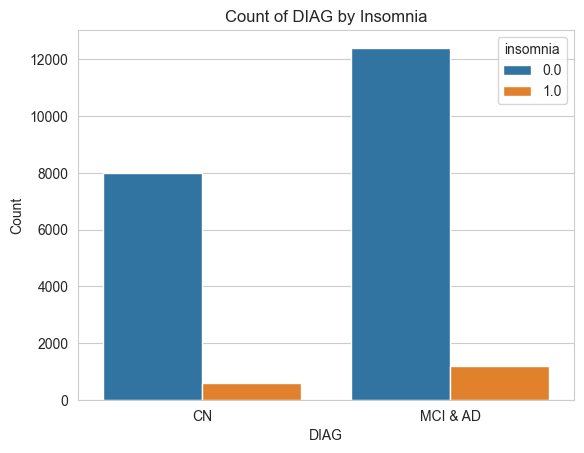

In [50]:

# Group DIAG by insomnia and create countplot
sns.countplot(data=cml1_mci_ad, x='DIAG', hue='insomnia')

# Set labels and title
plt.xlabel('DIAG')
plt.ylabel('Count')
plt.title('Count of DIAG by Insomnia')

# Show the plot
plt.show()


/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1031965520.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1031965520.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100


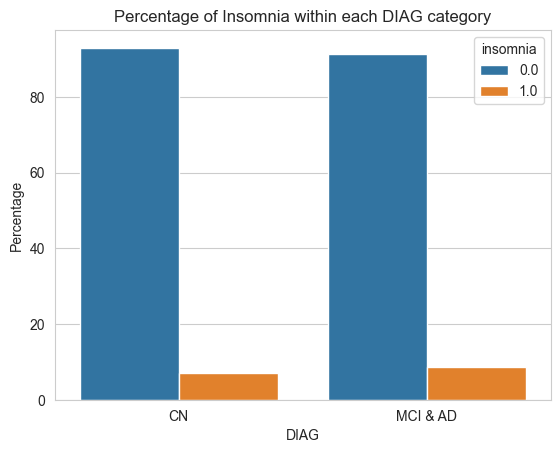

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages
total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100
percentages = percentages.reset_index(name='percentage')

# Plot
sns.barplot(data=percentages, x='DIAG', y='percentage', hue='insomnia')

# Set labels and title
plt.xlabel('DIAG')
plt.ylabel('Percentage')
plt.title('Percentage of Insomnia within each DIAG category')

# Show the plot
plt.show()





/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1702185330.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1702185330.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100


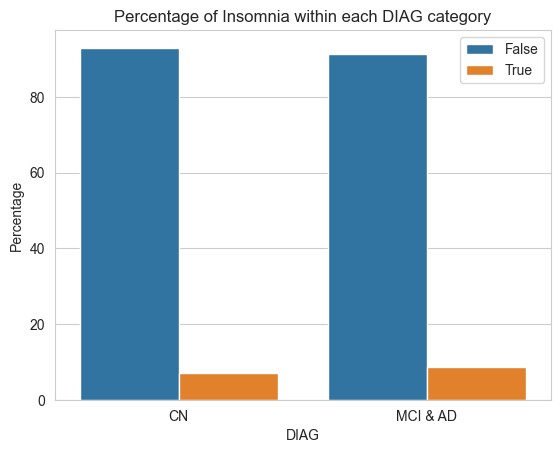

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages
total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100
percentages = percentages.reset_index(name='percentage')

# Plot
ax = sns.barplot(data=percentages, x='DIAG', y='percentage', hue='insomnia')

# Set labels and title
plt.xlabel('DIAG')
plt.ylabel('Percentage')
plt.title('Percentage of Insomnia within each DIAG category')

# Change legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['False', 'True'])

# Show the plot
plt.show()


/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/2874397402.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/2874397402.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100


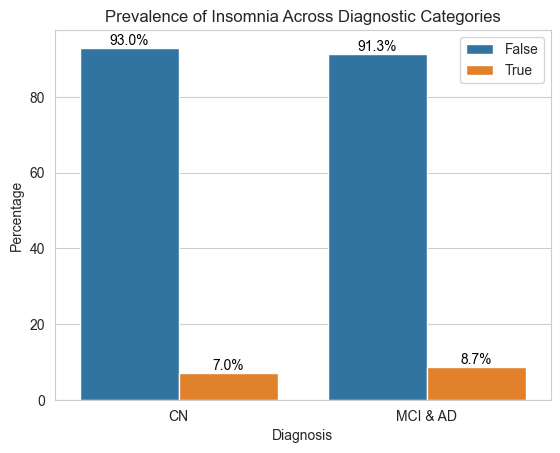

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate percentages
total_counts = cml1_mci_ad.groupby('DIAG')['insomnia'].count()
percentages = cml1_mci_ad.groupby(['DIAG', 'insomnia']).size() / total_counts * 100
percentages = percentages.reset_index(name='percentage')

# Plot
ax = sns.barplot(data=percentages, x='DIAG', y='percentage', hue='insomnia')

# Set labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.title('Prevalence of Insomnia Across Diagnostic Categories')

# Change legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['False', 'True'])

# Filter out bars with 0% percentage
non_zero_bars = [bar for bar in ax.patches if bar.get_height() != 0]

# Add percentage labels to each non-zero bar
for p in non_zero_bars:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black')

# Show the plot
plt.show()


/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1418420703.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = cml1_mci_ad.groupby('DIAG')['OSA'].count()
/var/folders/7s/zfw9033n0l71wpsvm8yc6p080000gn/T/ipykernel_3811/1418420703.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  percentages = cml1_mci_ad.groupby(['DIAG', 'OSA']).size() / total_counts * 100


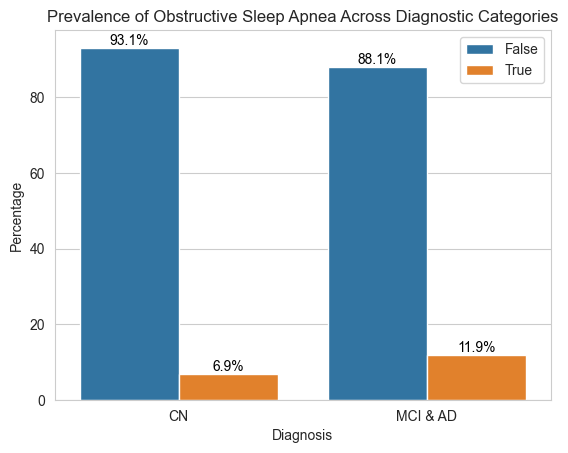

In [54]:
# Calculate percentages
total_counts = cml1_mci_ad.groupby('DIAG')['OSA'].count()
percentages = cml1_mci_ad.groupby(['DIAG', 'OSA']).size() / total_counts * 100
percentages = percentages.reset_index(name='percentage')

# Plot
ax = sns.barplot(data=percentages, x='DIAG', y='percentage', hue='OSA')

# Set labels and title
plt.xlabel('Diagnosis')
plt.ylabel('Percentage')
plt.title('Prevalence of Obstructive Sleep Apnea Across Diagnostic Categories')

# Change legend labels
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ['False', 'True'])

# Filter out bars with 0% percentage
non_zero_bars = [bar for bar in ax.patches if bar.get_height() != 0]

# Add percentage labels to each non-zero bar
for p in non_zero_bars:
    ax.annotate('{:.1f}%'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', color='black')

# Show the plot
plt.show()

In [55]:
eda.groupby(["insomnia","OSA"]).size() / len(eda) * 100

insomnia  OSA
0.0       0.0    80.760126
          1.0     8.727863
1.0       0.0     6.838506
          1.0     0.981939
dtype: float64

**NPIK Countplots with Absolute numbers** 

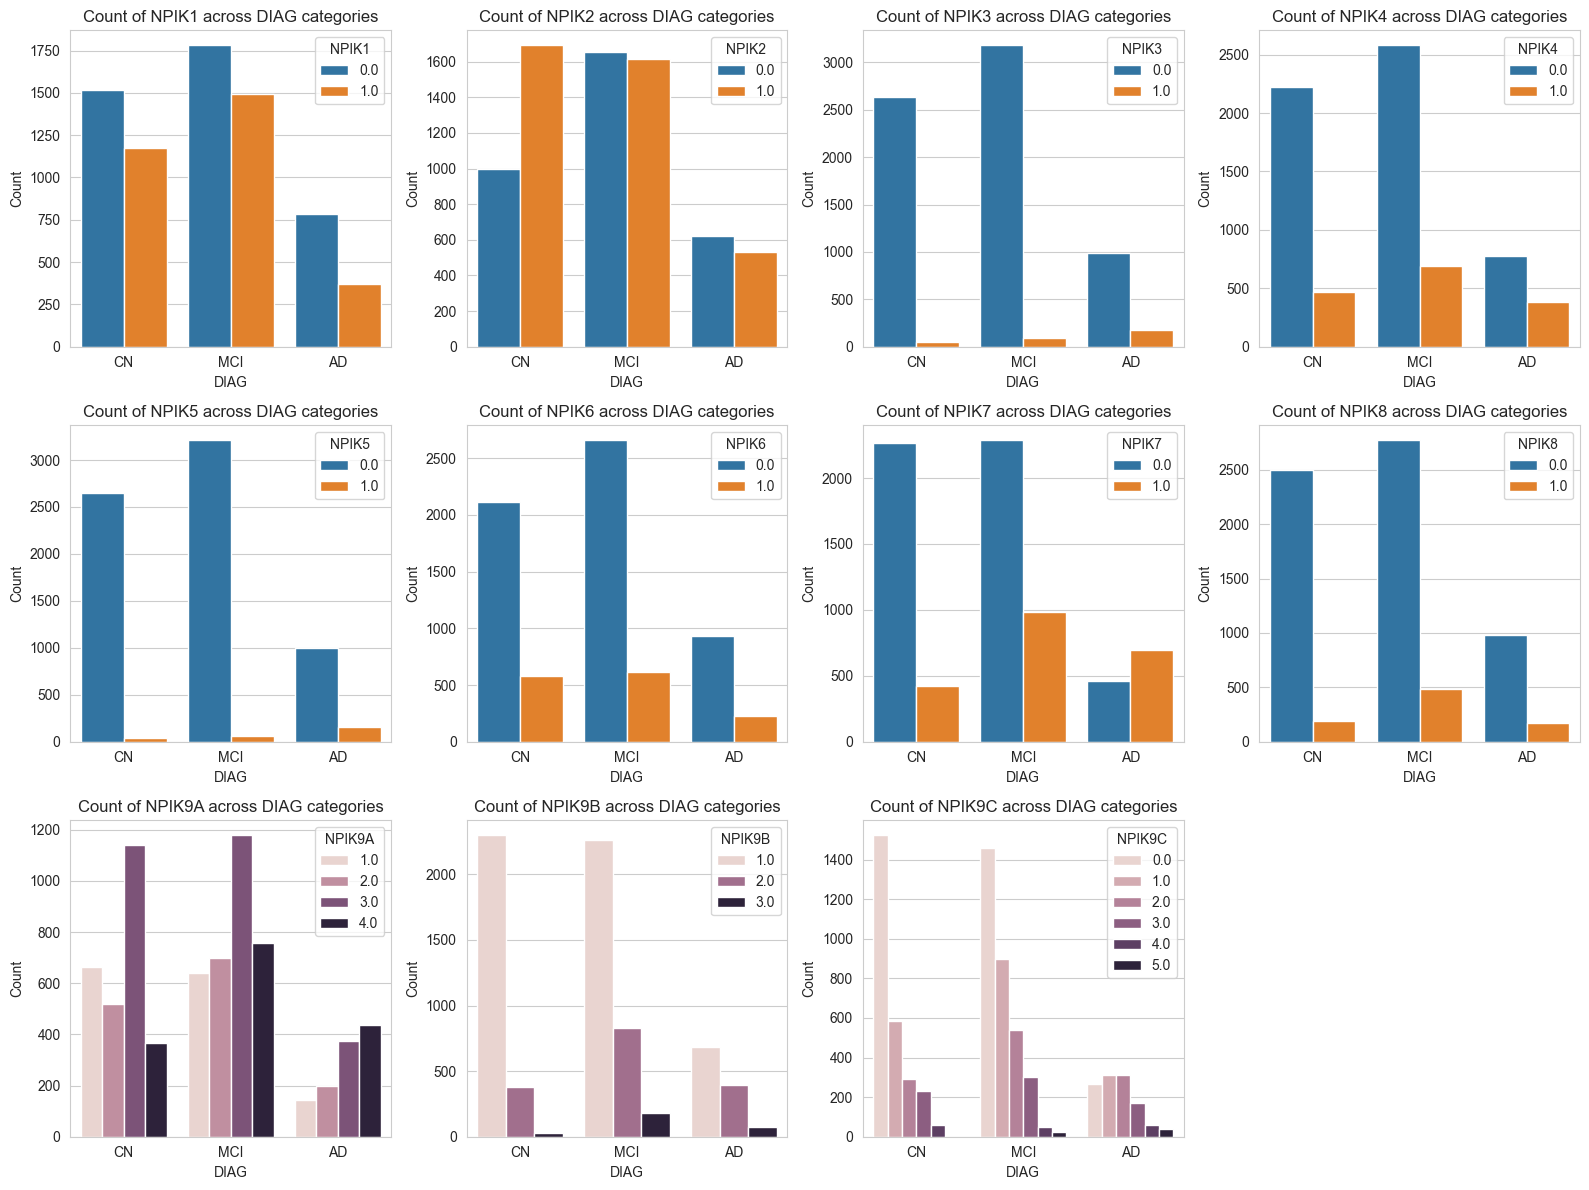

In [56]:
# Number of subplots (including NPIK1 to NPIK9C)
num_subplots = 11

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Plot countplots for each NPIK column
for i in range(num_subplots):
    if i < 8:
        sns.countplot(data=cml1, x='DIAG', hue=f'NPIK{i+1}', ax=axes[i])
        axes[i].set_title(f'Count of NPIK{i+1} across DIAG categories')
        axes[i].legend(title=f'NPIK{i+1}')
    elif i == 8:
        # Handling NPIK9A
        sns.countplot(data=cml1, x='DIAG', hue='NPIK9A', ax=axes[i])
        axes[i].set_title('Count of NPIK9A across DIAG categories')
        axes[i].legend(title='NPIK9A')
    elif i == 9:
        # Handling NPIK9B
        sns.countplot(data=cml1, x='DIAG', hue='NPIK9B', ax=axes[i])
        axes[i].set_title('Count of NPIK9B across DIAG categories')
        axes[i].legend(title='NPIK9B')
    else:
        # Handling NPIK9C
        sns.countplot(data=cml1, x='DIAG', hue='NPIK9C', ax=axes[i])
        axes[i].set_title('Count of NPIK9C across DIAG categories')
        axes[i].legend(title='NPIK9C')
    axes[i].set_xlabel('DIAG')
    axes[i].set_ylabel('Count')

# Hide extra subplots if not used
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


**NPIK Subplots with Proportions**

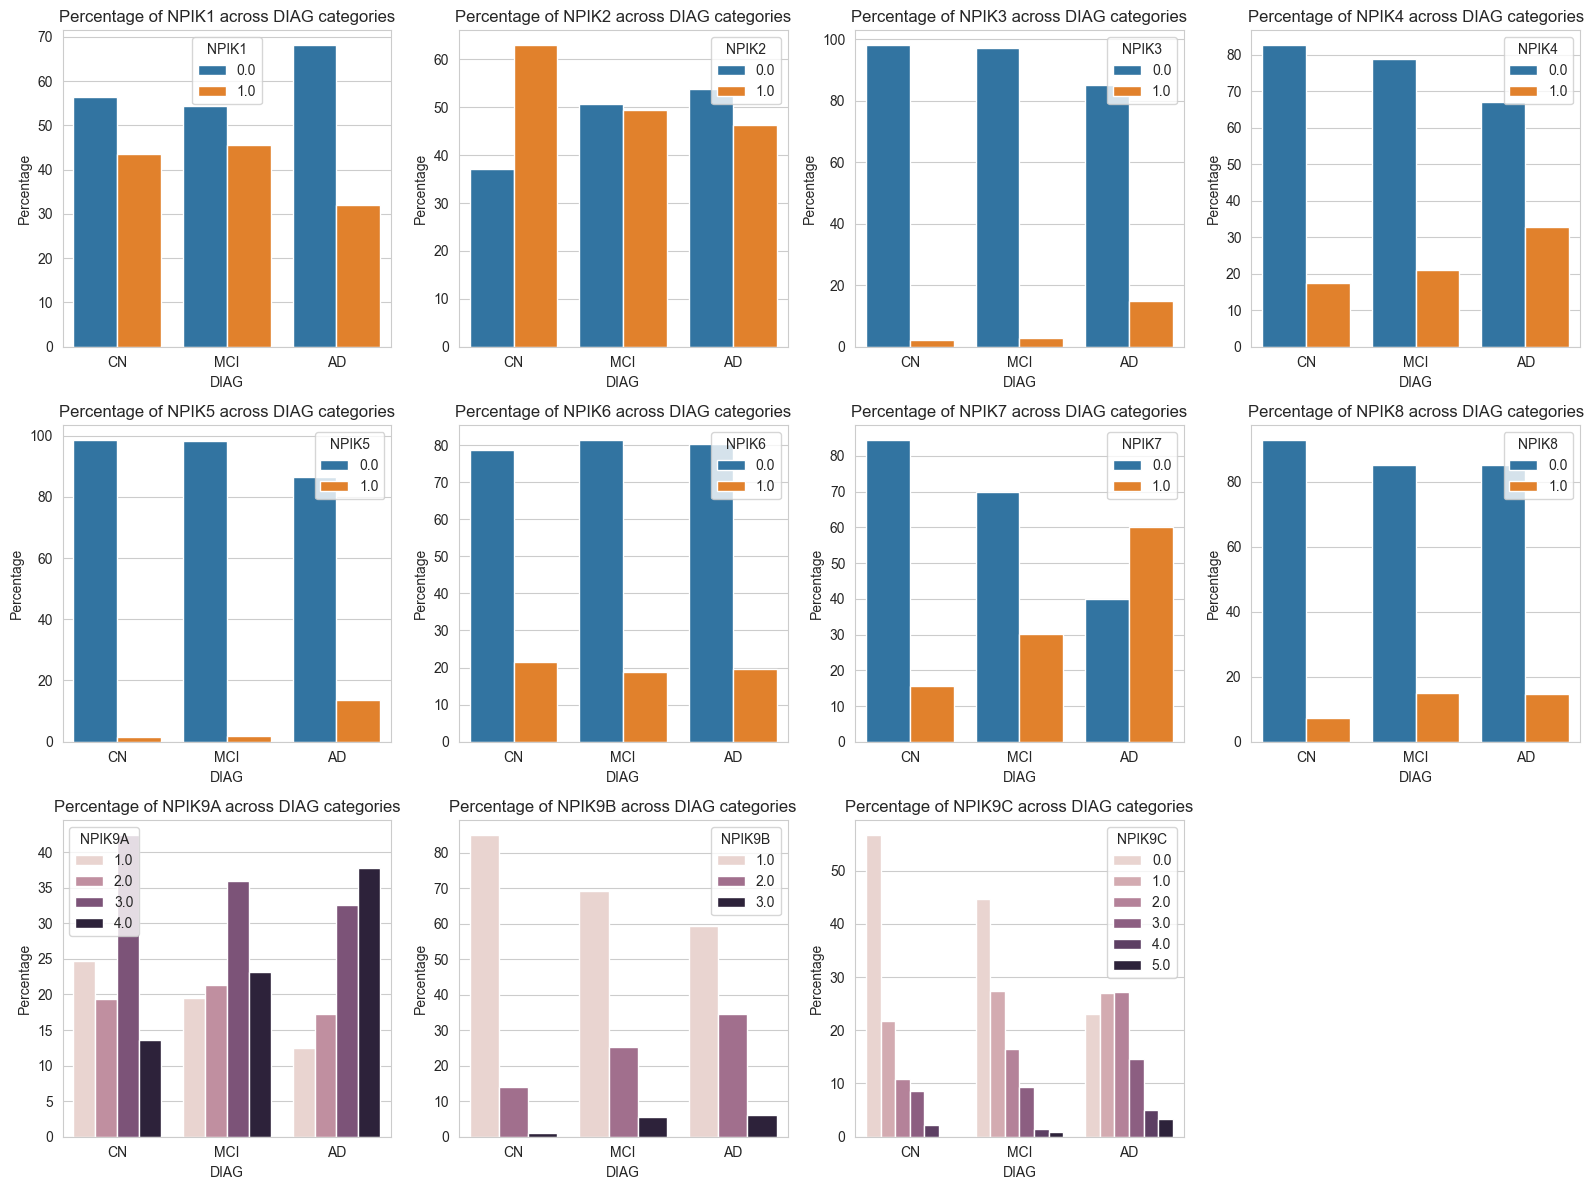

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Number of subplots (including NPIK1 to NPIK9C)
num_subplots = 11

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# Plot percentage plots for each NPIK column
for i in range(num_subplots):
    if i < 8:
        npik_col = f'NPIK{i+1}'
    elif i == 8:
        npik_col = 'NPIK9A'
    elif i == 9:
        npik_col = 'NPIK9B'
    else:
        npik_col = 'NPIK9C'
    
    # Create a crosstab of counts
    crosstab = pd.crosstab(cml1['DIAG'], cml1[npik_col], normalize='index') * 100  # Convert to percentages
    
    # Convert crosstab to long format for seaborn barplot
    crosstab = crosstab.reset_index().melt(id_vars='DIAG', var_name=npik_col, value_name='Percentage')
    
    # Plot the percentages
    sns.barplot(data=crosstab, x='DIAG', y='Percentage', hue=npik_col, ax=axes[i])
    
    # Set the title and legends
    axes[i].set_title(f'Percentage of {npik_col} across DIAG categories')
    axes[i].set_xlabel('DIAG')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title=npik_col)

# Hide extra subplots if not used
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


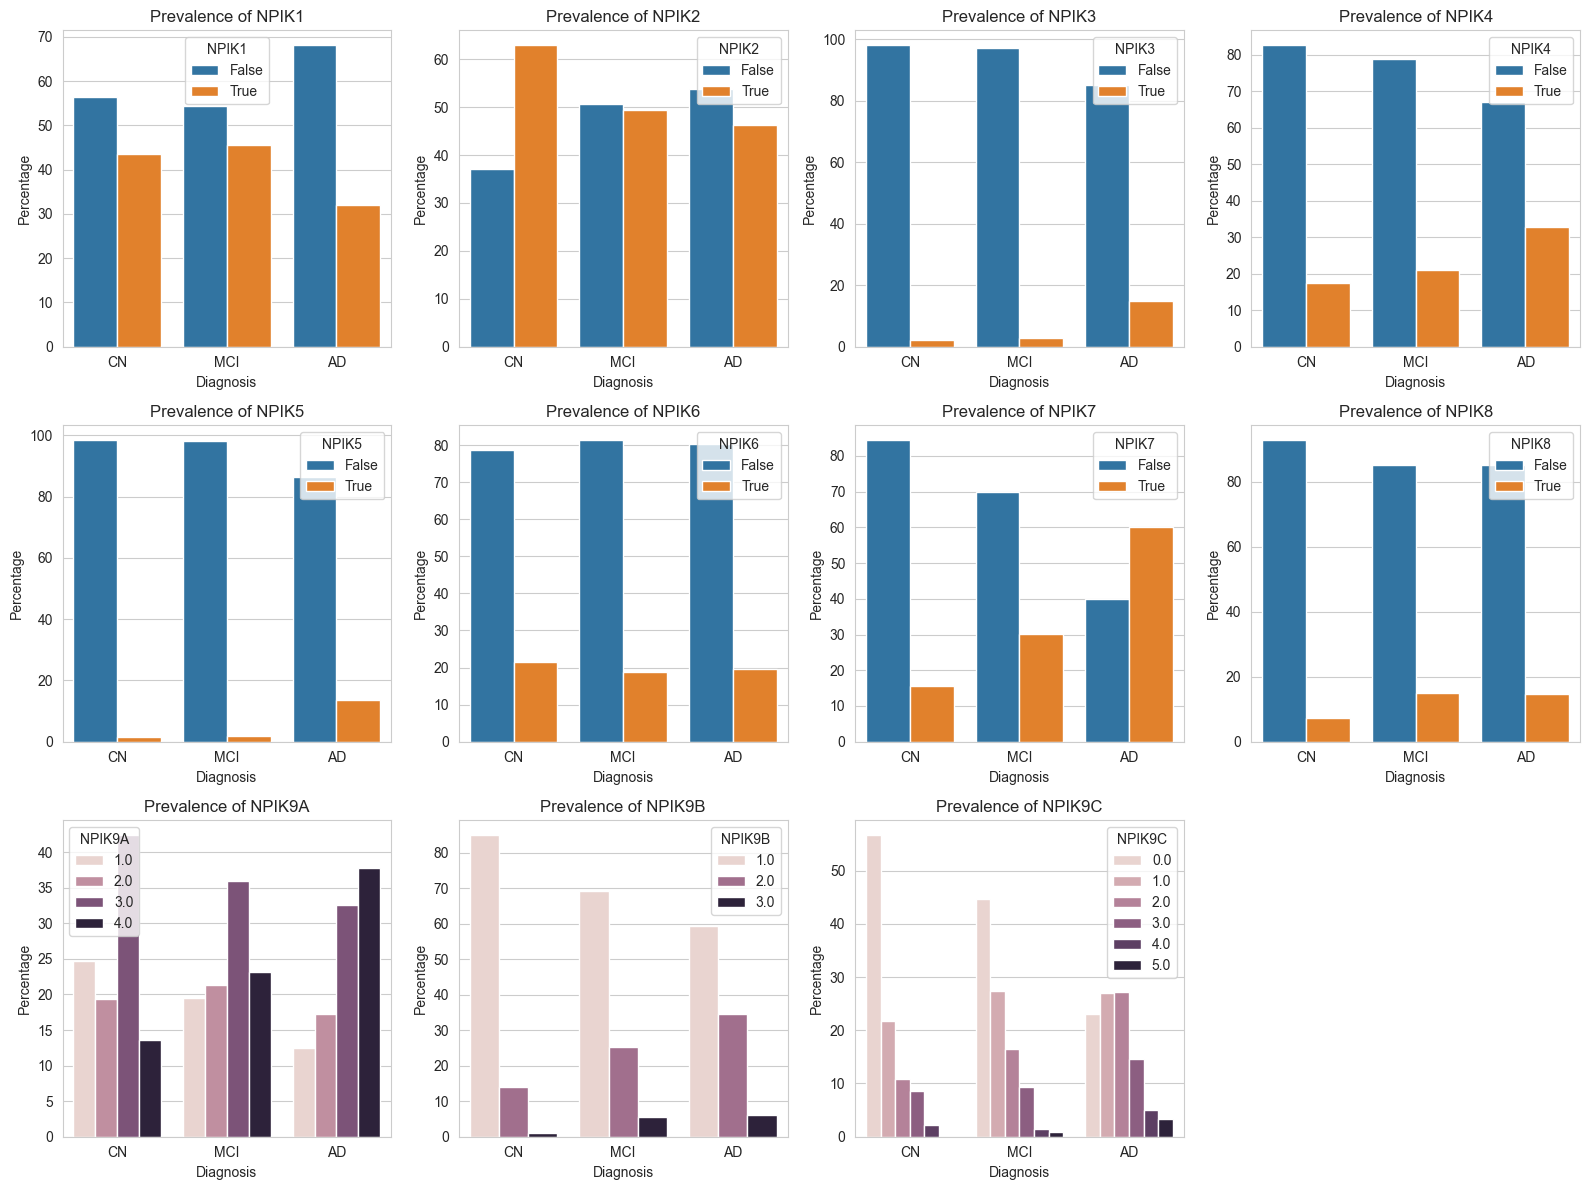

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Number of subplots (including NPIK1 to NPIK9C)
num_subplots = 11

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# List of NPIK columns to change from 0/1 to False/True
npik_columns = [f'NPIK{i+1}' for i in range(8)]

# Replace 0 and 1 with False and True for NPIK1 to NPIK8
cml1[npik_columns] = cml1[npik_columns].replace({0: False, 1: True})

# Plot percentage plots for each NPIK column
for i in range(num_subplots):
    if i < 8:
        npik_col = f'NPIK{i+1}'
    elif i == 8:
        npik_col = 'NPIK9A'
    elif i == 9:
        npik_col = 'NPIK9B'
    else:
        npik_col = 'NPIK9C'
    
    # Create a crosstab of counts
    crosstab = pd.crosstab(cml1['DIAG'], cml1[npik_col], normalize='index') * 100  # Convert to percentages
    
    # Convert crosstab to long format for seaborn barplot
    crosstab = crosstab.reset_index().melt(id_vars='DIAG', var_name=npik_col, value_name='Percentage')
    
    # Plot the percentages
    sns.barplot(data=crosstab, x='DIAG', y='Percentage', hue=npik_col, ax=axes[i])
    
    # Set the title and legends
    axes[i].set_title(f'Prevalence of {npik_col}')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title=npik_col)

# Hide extra subplots if not used
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

plt.savefig('prevalence_of_NPIK.png', bbox_inches='tight', dpi=300)

# Show plot
plt.show()


Percentages for NPIK1:
NPIK1      False      True 
DIAG                       
CN     56.415024  43.584976
MCI    54.334554  45.665446
AD     68.079585  31.920415
Percentages for NPIK2:
NPIK2      False      True 
DIAG                       
CN     37.114169  62.885831
MCI    50.657693  49.342307
AD     53.806228  46.193772
Percentages for NPIK3:
NPIK3      False      True 
DIAG                       
CN     97.954630   2.045370
MCI    97.246864   2.753136
AD     85.121107  14.878893
Percentages for NPIK4:
NPIK4      False      True 
DIAG                       
CN     82.595761  17.404239
MCI    78.910315  21.089685
AD     67.128028  32.871972
Percentages for NPIK5:
NPIK5      False      True 
DIAG                       
CN     98.399702   1.600298
MCI    98.133986   1.866014
AD     86.481802  13.518198
Percentages for NPIK6:
NPIK6      False      True 
DIAG                       
CN     78.579398  21.420602
MCI    81.248088  18.751912
AD     80.363322  19.636678
Percentages for NPIK7:

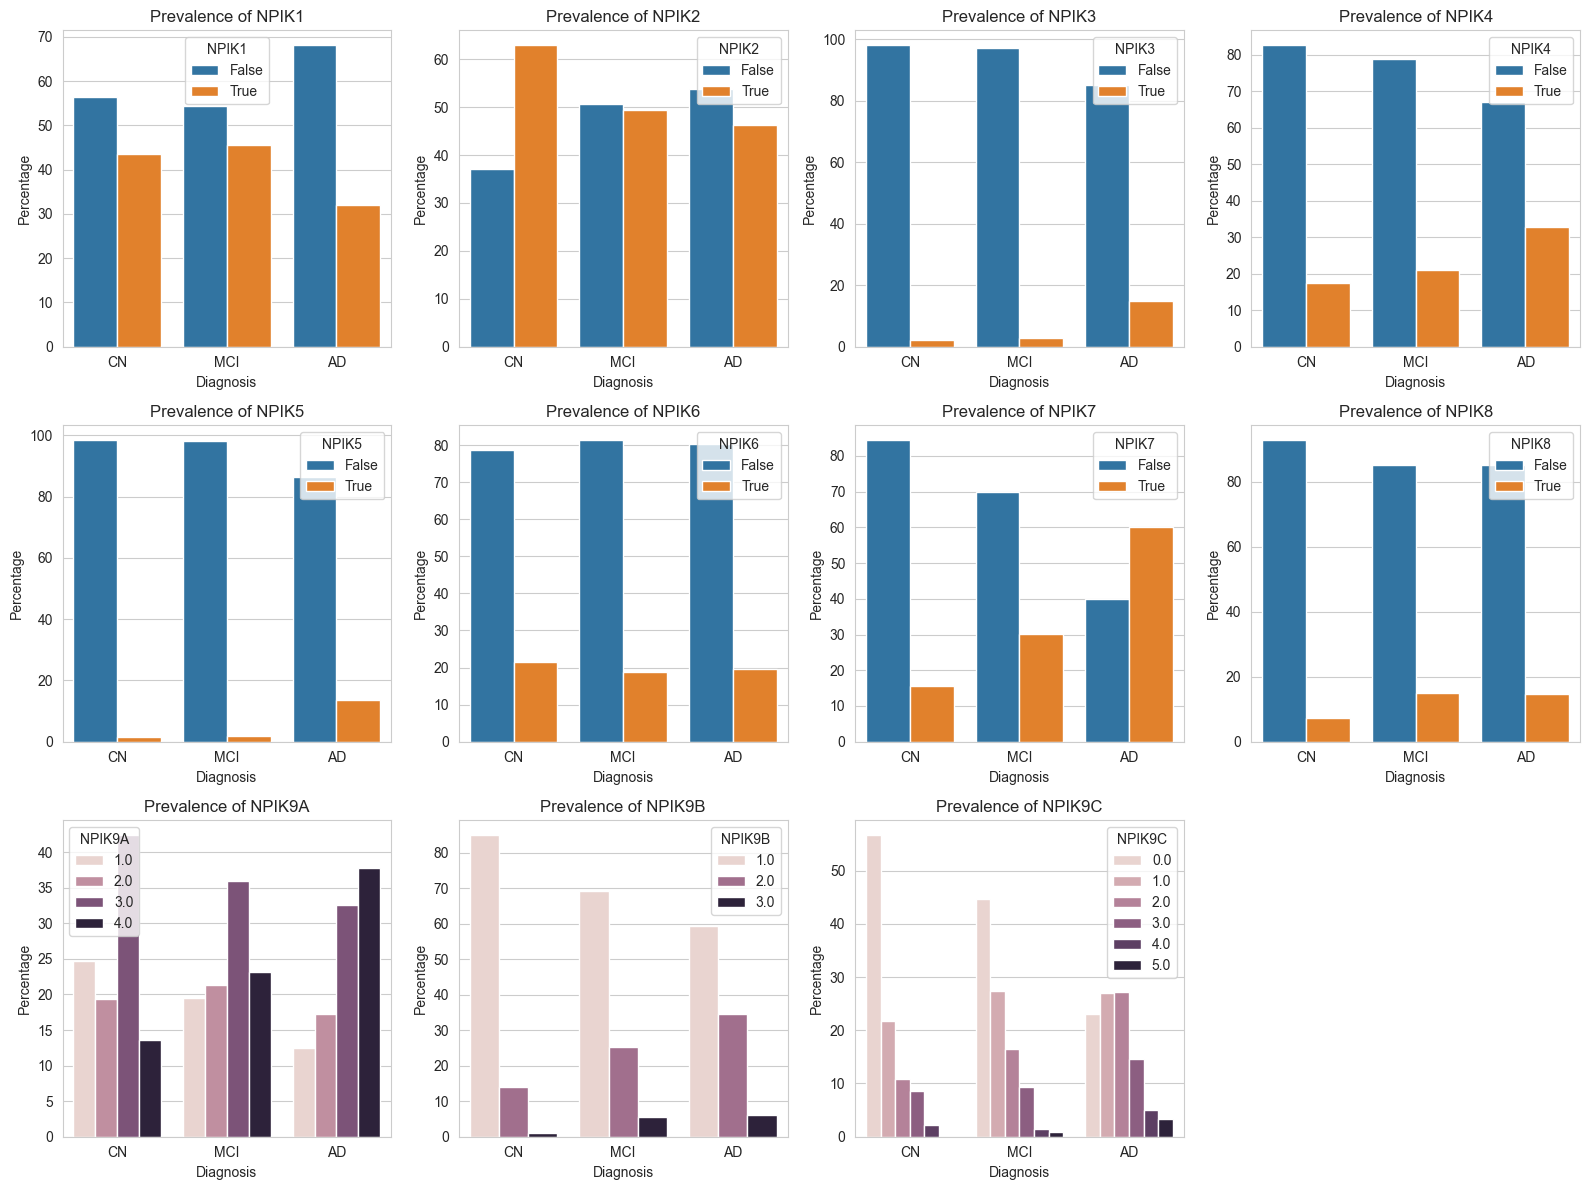

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Number of subplots (including NPIK1 to NPIK9C)
num_subplots = 11

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.flatten()

# List of NPIK columns to change from 0/1 to False/True
npik_columns = [f'NPIK{i+1}' for i in range(8)]

# Replace 0 and 1 with False and True for NPIK1 to NPIK8
cml1[npik_columns] = cml1[npik_columns].replace({0: False, 1: True})

# Function to print percentages
def print_percentages(crosstab):
    print(crosstab)

# Plot percentage plots for each NPIK column
for i in range(num_subplots):
    if i < 8:
        npik_col = f'NPIK{i+1}'
    elif i == 8:
        npik_col = 'NPIK9A'
    elif i == 9:
        npik_col = 'NPIK9B'
    else:
        npik_col = 'NPIK9C'
    
    # Create a crosstab of counts
    crosstab = pd.crosstab(cml1['DIAG'], cml1[npik_col], normalize='index') * 100  # Convert to percentages
    
    # Convert crosstab to long format for seaborn barplot
    crosstab_long = crosstab.reset_index().melt(id_vars='DIAG', var_name=npik_col, value_name='Percentage')
    
    # Plot the percentages
    sns.barplot(data=crosstab_long, x='DIAG', y='Percentage', hue=npik_col, ax=axes[i])
    
    # Set the title and legends
    axes[i].set_title(f'Prevalence of {npik_col}')
    axes[i].set_xlabel('Diagnosis')
    axes[i].set_ylabel('Percentage')
    axes[i].legend(title=npik_col)
    
    # Print the percentages
    print(f'Percentages for {npik_col}:')
    print_percentages(crosstab)

# Hide extra subplots if not used
for i in range(num_subplots, len(axes)):
    axes[i].axis('off')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


In [60]:
eda.NPIK1.value_counts()
eda.groupby(["NPIK1","DIAG"]).size() 

NPIK1  DIAG
0.0    AD       787
       MCI     1780
       NL      1517
1.0    AD       369
       MCI     1496
       NL      1172
dtype: int64

In [61]:
import missingno as msno

<Axes: >

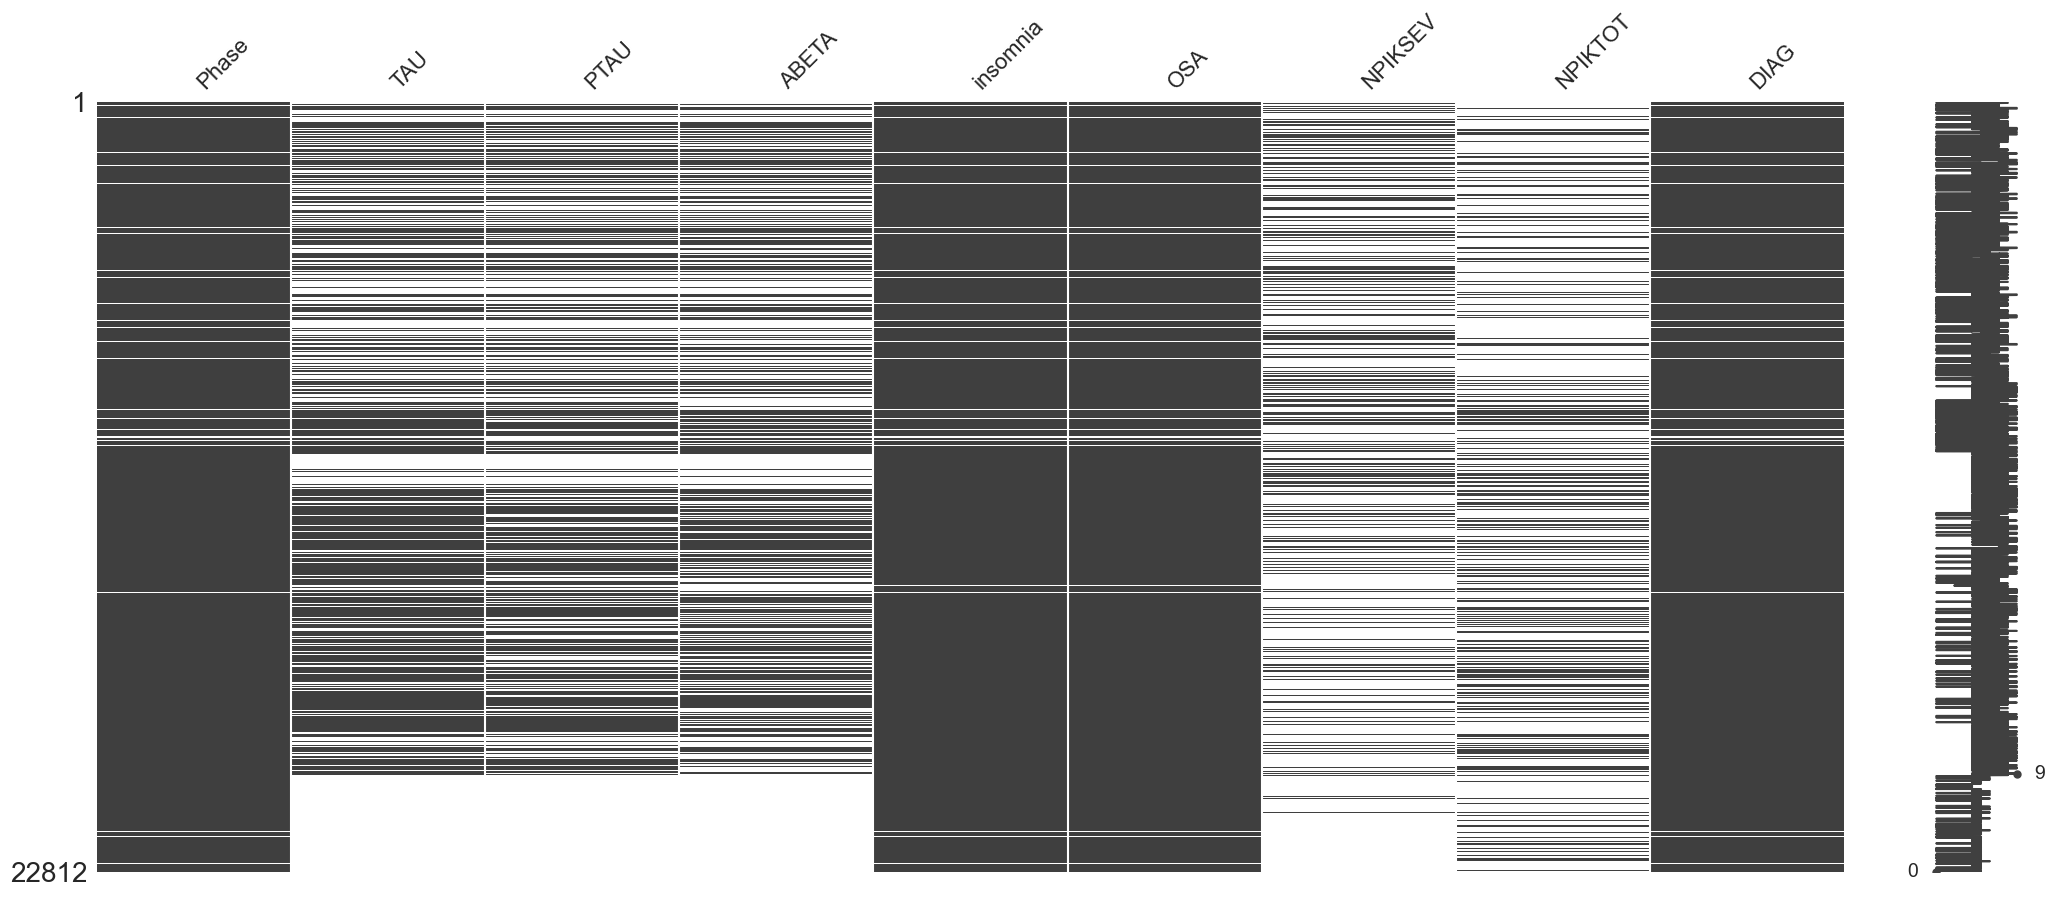

In [62]:
msno_reduced = cml1[["Phase", "TAU", "PTAU", "ABETA", "insomnia", "OSA", "NPIKSEV", "NPIKTOT", "DIAG"]]
msno.matrix(msno_reduced)

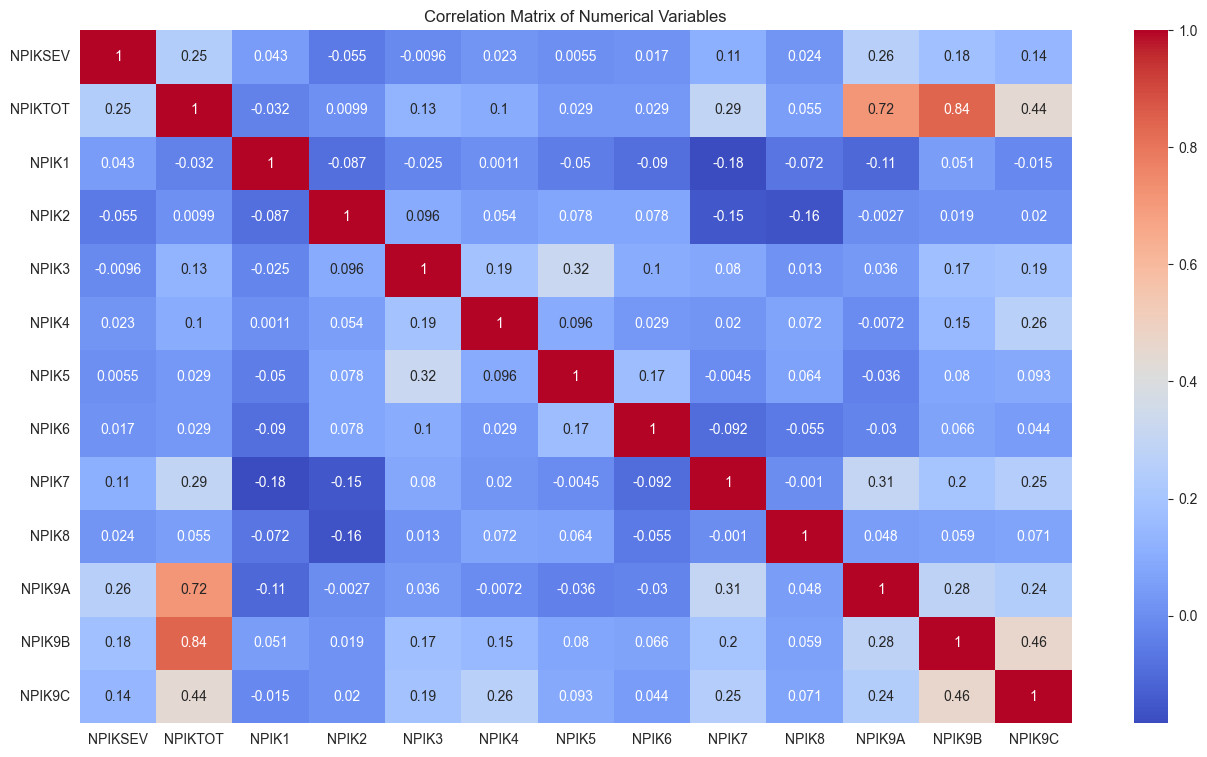

In [63]:
plt.figure(figsize = (16, 9), dpi = 100) 
corr_matrix = npik.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

<Axes: >

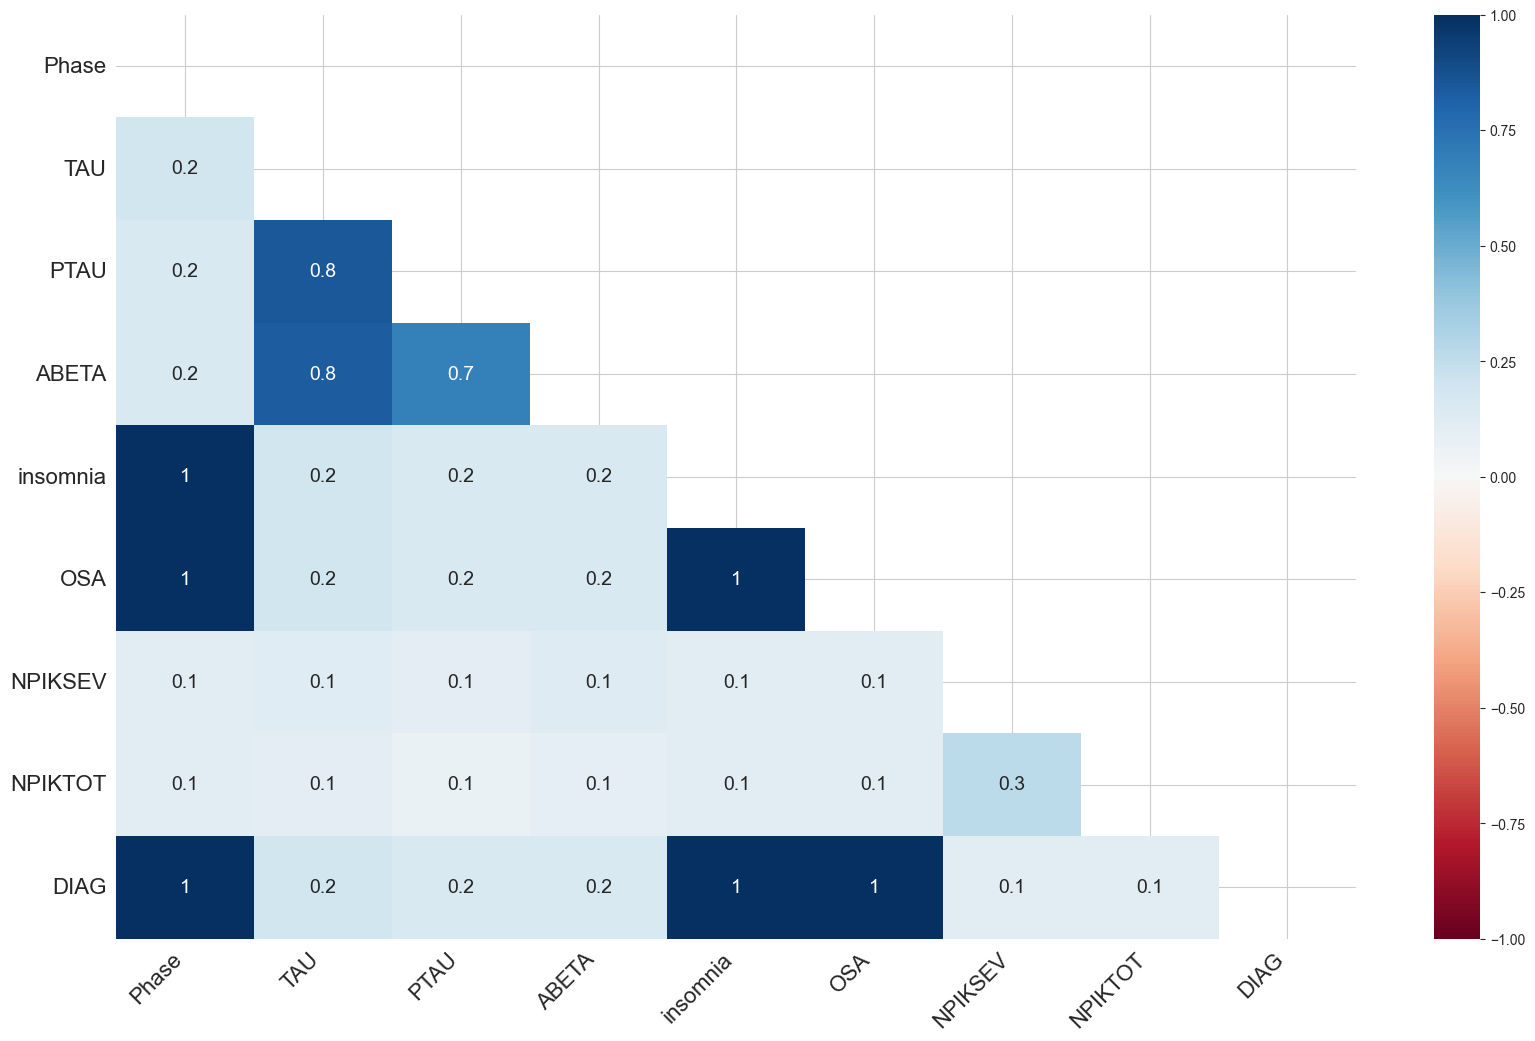

In [64]:
msno.heatmap(msno_reduced)
# msno.bar(msno_reduced)
# msno.dendrogram(msno_reduced)

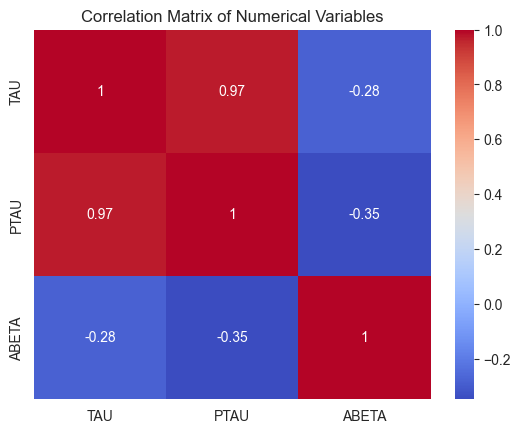

In [65]:
reduced = cml1[["TAU", "PTAU", "ABETA"]]
corr_matrix = reduced.corr()
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

We need a Multinomial / Softmax Logistic Regression model as we have got K = 3 Classes (NL, MCI, AD)

**Binary Logistic Regression Model (Alzheimer = "True" / "False")**

In [66]:
binary = cml1.copy()
# Drop all rows with NaNs in several Columns (maybe this is not necessary for the predictors)
binary.dropna(subset = ["insomnia", "OSA"], inplace = True)
# binary.dropna(subset = ["insomnia", "OSA", "TAU", "PTAU", "ABETA"], inplace = True)

# Extract rows exactly matching several values
binary = binary[binary["DIAG"].isin(["NL", "AD"])]
binary.DIAG.value_counts()

DIAG
AD     4267
CN        0
MCI       0
Name: count, dtype: int64

In [67]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS,
summarize)

In [68]:
vars = ["insomnia", "OSA"]
design = MS(vars)
X = design.fit_transform(binary)
y = binary.DIAG == "AD"
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
print(results.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   DIAG   No. Observations:                 4267
Model:                            GLM   Df Residuals:                     4264
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -1.6827e-09
Date:                Thu, 13 Jun 2024   Deviance:                   3.3502e-09
Time:                        15:25:56   Pearson chi2:                 1.68e-09
No. Iterations:                    27   Pseudo R-squ. (CS):         -7.390e-13
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     28.5661   1.59e+04      0.002      0.9

/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSe

In [69]:
results.predict()


array([1., 1., 1., ..., 1., 1., 1.])

In [70]:
binary.OSA.value_counts()

OSA
0.0    3873
1.0     394
Name: count, dtype: int64

In [71]:
binary = cml1.copy()
binary.dropna(subset = ["insomnia", "OSA", "TAU", "ABETA"], inplace = True)

# Extract rows exactly matching several values
binary = binary[binary["DIAG"].isin(["NL", "AD"])]

vars = ["insomnia", "OSA", "TAU", "ABETA"]
design = MS(vars)
X = design.fit_transform(binary)
y = binary.DIAG == "AD"
glm = sm.GLM(y,
X,
family=sm.families.Binomial())
results = glm.fit()
summarize(results)

/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/genmod/generalized_linear_model.py:1342: PerfectSe

,coef,std err,z,P>|z|
intercept,2.756610e+01,46600.000,1.000000e-03,1.0
insomnia,-3.064000e-14,62800.000,-4.880000e-19,1.0
OSA,1.454000e-14,41700.000,3.490000e-19,1.0
TAU,-4.153000e-16,89.267,-4.650000e-18,1.0
ABETA,1.907000e-16,49.778,3.830000e-18,1.0


**Multinomial Model with probabilities for NL, MCI and AD**

In [72]:
multinomial = cml1.copy()
multinomial = multinomial[multinomial["DIAG"].isin(["NL", "MCI", "AD"])]
# Setting ordered categories is necessary to set "NL" as the baseline!
multinomial["DIAG"] = pd.Categorical(multinomial["DIAG"], categories  = ["NL", "MCI", "AD"], ordered = True)
multinomial.dropna(subset = ["insomnia", "OSA", "TAU", "ABETA"], inplace = True)
# Define your predictors and response variable
vars = ["insomnia", "OSA", "TAU", "ABETA"]
design = MS(vars)
X = design.fit_transform(multinomial)
y = multinomial.DIAG  # Assuming DIAG contains categories NL, MCI, AD

# Fit a multinomial logistic regression model
mlogit = sm.MNLogit(y, X)
mlogit_results = mlogit.fit()

# Fit a softmax regression model (doesn't change anything)
# softmax_model = sm.MNLogit(y, X)
# softmax_results = softmax_model.fit()

# Summarize the results
print(mlogit_results.summary())

/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/ramin/PycharmProjects/Data Science/.venv/lib/python3.12/site-packages/statsmodels/discrete/discrete_model.py:5475: RuntimeWarning: invalid value encountered in sqrt
  bse = np.sqrt(np.diag(self.cov_params()))


         Current function value: 0.506644
         Iterations: 35
                          MNLogit Regression Results                          
Dep. Variable:                   DIAG   No. Observations:                 7168
Model:                        MNLogit   Df Residuals:                     7158
Method:                           MLE   Df Model:                            8
Date:                Thu, 13 Jun 2024   Pseudo R-squ.:                  0.1510
Time:                        15:25:56   Log-Likelihood:                -3631.6
converged:                      False   LL-Null:                       -4277.4
Covariance Type:            nonrobust   LLR p-value:                1.658e-273
  DIAG=MCI       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      7.7083        nan        nan        nan         nan         nan
insomnia      13.9468   8.39e+08   1.66e-08      1.000   -1.64e+0

In [73]:
# column 0 are probabilities for NL, column 1 for MCI and column 2 for AD
mlogit_results.predict()

array([[8.05202622e-21, 7.64753795e-01, 2.35246205e-01],
       [8.10193904e-27, 8.77481979e-01, 1.22518021e-01],
       [8.10193904e-27, 8.77481979e-01, 1.22518021e-01],
       ...,
       [1.50319974e-13, 6.76249030e-01, 3.23750970e-01],
       [1.50319974e-13, 6.76249030e-01, 3.23750970e-01],
       [3.10562191e-22, 8.96333922e-01, 1.03666078e-01]])

In [74]:
multinomial.reset_index(inplace = True)
multinomial 

,index,RID,DIAG,VISCODE2,PTID,AGE,PTGENDER,PTEDUCAT,Phase,EXAMDATE,...,NPIK8,NPIK9A,NPIK9B,NPIK9C,NPIKTOT,NPIKSEV,OSA,PREV_DIAG,DIAG_CHANGED,DIAG_GROUP
0,18,3,AD,sc,011_S_0003,81.3,Male,18.0,ADNI1,2005-12-09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AD,False,AD-AD
1,19,3,AD,bl,011_S_0003,81.3,Male,18.0,ADNI1,2005-12-09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AD,False,AD-AD
2,20,3,AD,m06,011_S_0003,81.3,Male,18.0,ADNI1,2006-03-13,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AD,False,AD-AD
3,21,3,AD,m12,011_S_0003,81.3,Male,18.0,ADNI1,2006-12-09,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AD,False,AD-AD
4,22,3,AD,m18,011_S_0003,81.3,Male,18.0,ADNI1,2007-12-03,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,AD,False,AD-AD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7163,19808,5135,MCI,m66,029_S_5135,77.0,Male,16.0,ADNI3,2014-05-22,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NL,True,NL-MCI
7164,19809,5135,MCI,m78,029_S_5135,77.0,Male,16.0,ADNI3,2014-05-22,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,MCI,False,MCI-MCI
7165,19884,5234,MCI,m48,114_S_5234,78.6,Female,15.0,ADNI3,2019-01-29,...,True,1.0,1.0,0.0,1.0,NaN,0.0,MCI,False,MCI-MCI
7166,19885,5234,MCI,m66,114_S_5234,78.6,Female,15.0,ADNI3,2019-01-29,...,True,1.0,1.0,0.0,1.0,NaN,0.0,MCI,False,MCI-MCI


In [75]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict class probabilities
predicted_probs = mlogit_results.predict(X)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probs.values, axis=1)  # Choose the class with the highest probability

# Get actual class labels
actual_labels = y.cat.codes  # Assuming y is a pandas Categorical Series

# Create confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy & error rate
accuracy = round(np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100, 2)
error_rate = round(100 - np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100, 2)
print("Accuracy:  ", accuracy, "%")
print("Error Rate:", error_rate, "%")

# Print classification report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels, target_names=["NL", "MCI", "AD"]))

# Confusion Matrix
# Rows: Represent the actual classes.
# Columns: Represent the predicted classes.

Confusion Matrix:
[[4775  357]
 [1486  550]]
Accuracy:   74.29 %
Error Rate: 25.71 %

Classification Report:


ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

**Multinomial Model with Insomnia, OSA & NPIK variables**

In [81]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict class probabilities
predicted_probs = mlogit_results.predict(X)

# Convert probabilities to class labels
predicted_labels = np.argmax(predicted_probs.values, axis=1)  # Choose the class with the highest probability

# Get actual class labels
actual_labels = y.cat.codes  # Assuming y is a pandas Categorical Series

# Create confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Calculate accuracy & error rate
accuracy = round(np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100, 2)
error_rate = round(100 - np.sum(np.diag(conf_matrix)) / np.sum(conf_matrix) * 100, 2)
print("Accuracy:  ", accuracy, "%")
print("Error Rate:", error_rate, "%")

# Print classification report
print("\nClassification Report:")
print(classification_report(actual_labels, predicted_labels, target_names=["NL", "MCI", "AD"]))

# Confusion Matrix
# Rows: Represent the actual classes.
# Columns: Represent the predicted classes.

AttributeError: 'DataFrame' object has no attribute 'cat'